In [14]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from passenger import *


# file = open('out_p1500e10f50cSimpleRevisedRouteController.bin', 'rb')
file = open('out_p1500e15f50cSimpleRevisedRouteController.bin', 'rb')

db = pickle.load(file)
passengers = db['passengers']
file.close


p_dict = [vars(passenger) for passenger in passengers]


p_dict[0]


{'weight': 95.72861889340082,
 'route': [0, 29, 0],
 'floor': 0,
 'route_index': 0,
 'state': <States.Waiting: 2>,
 'waitingTime': 33022.0,
 'rideTime': 0}

In [15]:
data = pd.DataFrame.from_records(p_dict)
data

,weight,route,floor,route_index,state,waitingTime,rideTime
0,95.728619,"[0, 29, 0]",0,0,States.Waiting,33022.0,0.0
1,117.621122,"[0, 42, 6, 2, 0]",0,0,States.Waiting,31493.0,0.0
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,7651.5,2071.0
3,116.442896,"[0, 9, 36, 0]",0,0,States.Waiting,35624.5,0.0
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,32090.5,2095.5
...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,13472.5,3331.0
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,216.0,411.5
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,5144.0,2883.0
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,10415.5,2304.5


<AxesSubplot:ylabel='Frequency'>

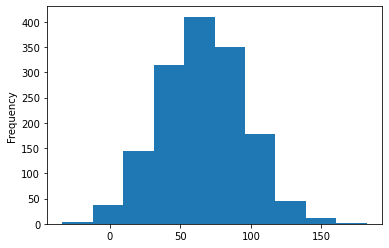

In [16]:
data['weight'].plot.hist(bins=10)

In [17]:
data['meanWait'] = data.waitingTime / data['route'].map(len)
data['meanTravel'] = data.rideTime / data['route'].map(len)
data

,weight,route,floor,route_index,state,waitingTime,rideTime,meanWait,meanTravel
0,95.728619,"[0, 29, 0]",0,0,States.Waiting,33022.0,0.0,11007.333333,0.000000
1,117.621122,"[0, 42, 6, 2, 0]",0,0,States.Waiting,31493.0,0.0,6298.600000,0.000000
2,86.082854,"[0, 45, 9, 0]",0,3,States.Idle,7651.5,2071.0,1912.875000,517.750000
3,116.442896,"[0, 9, 36, 0]",0,0,States.Waiting,35624.5,0.0,8906.125000,0.000000
4,58.098795,"[0, 11, 27, 14, 0]",0,4,States.Idle,32090.5,2095.5,6418.100000,419.100000
...,...,...,...,...,...,...,...,...,...
1495,49.619487,"[0, 28, 41, 33, 7, 4, 0]",0,6,States.Idle,13472.5,3331.0,1924.642857,475.857143
1496,52.336139,"[0, 48, 0]",0,2,States.Idle,216.0,411.5,72.000000,137.166667
1497,63.485566,"[0, 16, 35, 7, 17, 44, 0]",0,6,States.Idle,5144.0,2883.0,734.857143,411.857143
1498,41.751772,"[0, 17, 31, 16, 20, 19, 0]",0,6,States.Idle,10415.5,2304.5,1487.928571,329.214286


<AxesSubplot:ylabel='Frequency'>

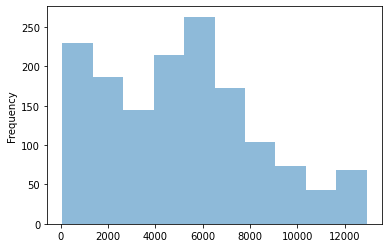

In [18]:
from cProfile import label


data.meanWait.plot.hist(alpha=0.5, bins=10)
# data.meanTravel.plot.hist(alpha=0.5)
# (data.meanWait + data.meanTravel).plot.hist(alpha=0.5, label="combined")
# plt.legend()

In [19]:
data.meanWait.describe()

count     1500.000000
mean      5132.484440
std       3216.233996
min         72.000000
25%       2257.508333
50%       5078.933333
75%       7333.350000
max      12930.666667
Name: meanWait, dtype: float64

Estimated throughput: 0.11633333333333333


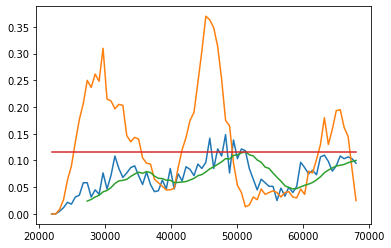

In [42]:
throughput = db['throughput']


elevator_raw = pd.DataFrame(throughput['elevator']).rolling(10).mean()
approx = [elevator_raw.max()[0]] * len(throughput['timestamps'])
plt.plot(throughput['timestamps'], throughput['elevator'])
plt.plot(throughput['timestamps'], throughput['demand'])
plt.plot(throughput['timestamps'], elevator_raw)
plt.plot(throughput['timestamps'], approx)

print('Estimated throughput:', elevator_raw.max()[0])
